# Prototipo Time Series predecir Golstein

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [3]:
events = pd.read_csv("20240812.export.CSV", sep='\t')


In [4]:
events.columns = [
    "GLOBALEVENTID", "SQLDATE", "MonthYear", "Year", "FractionDate",
    "Actor1Code", "Actor1Name", "Actor1CountryCode", "Actor1KnownGroupCode",
    "Actor1EthnicCode", "Actor1Religion1Code", "Actor1Religion2Code",
    "Actor1Type1Code", "Actor1Type2Code", "Actor1Type3Code", "Actor2Code",
    "Actor2Name", "Actor2CountryCode", "Actor2KnownGroupCode",
    "Actor2EthnicCode", "Actor2Religion1Code", "Actor2Religion2Code",
    "Actor2Type1Code", "Actor2Type2Code", "Actor2Type3Code", "IsRootEvent",
    "EventCode", "EventBaseCode", "EventRootCode", "QuadClass",
    "GoldsteinScale", "NumMentions", "NumSources", "NumArticles", "AvgTone",
    "Actor1Geo_Type", "Actor1Geo_FullName", "Actor1Geo_CountryCode",
    "Actor1Geo_ADM1Code", "Actor1Geo_Lat", "Actor1Geo_Long",
    "Actor1Geo_FeatureID", "Actor2Geo_Type", "Actor2Geo_FullName",
    "Actor2Geo_CountryCode", "Actor2Geo_ADM1Code", "Actor2Geo_Lat",
    "Actor2Geo_Long", "Actor2Geo_FeatureID", "ActionGeo_Type",
    "ActionGeo_FullName", "ActionGeo_CountryCode", "ActionGeo_ADM1Code",
    "ActionGeo_Lat", "ActionGeo_Long", "ActionGeo_FeatureID", "DATEADDED",
    "SOURCEURL"
]

In [5]:
events.head(10)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1192141741,20230813,202308,2023,2023.6110,GBREDU,SCOTLAND,GBR,NaN,NaN,NaN,NaN,EDU,NaN,NaN,GBR,SCOTLAND,GBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51,51,5,1,3.4,12,2,12,-0.600302,4,"Northern Ireland, Craigavon, United Kingdom",UK,UKR8,54.50000,-6.5000,-2604275,4,"Northern Ireland, Craigavon, United Kingdom",UK,UKR8,54.5000,-6.5000,-2604275,4,"Northern Ireland, Craigavon, United Kingdom",UK,UKR8,54.50000,-6.5000,-2604275,20240812,https://jerseyeveningpost.com/morenews/uknews/...
1,1192141742,20230813,202308,2023,2023.6110,GOV,MINISTRY,NaN,NaN,NaN,NaN,NaN,GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,12,1,1,-0.4,20,1,20,-3.638193,4,"Phuket, Phuket, Thailand",TH,TH62,7.83333,98.3833,-3253342,0,NaN,NaN,NaN,NaN,NaN,NaN,4,"Phuket, Phuket, Thailand",TH,TH62,7.83333,98.3833,-3253342,20240812,https://www.bangkokpost.com/thailand/general/2...
2,1192141743,20230813,202308,2023,2023.6110,NZLEDU,NEW ZEALAND,NZL,NaN,NaN,NaN,NaN,EDU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,20,2,1,3.0,10,1,10,2.937063,1,New Zealand,NZ,NZ,-42.00000,174.0000,NZ,0,NaN,NaN,NaN,NaN,NaN,NaN,1,New Zealand,NZ,NZ,-42.00000,174.0000,NZ,20240812,https://menafn.com/1108542423/Bilingualism-Und...
3,1192141744,20240713,202407,2024,2024.5288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,CALIFORNIA,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,311,31,3,1,5.2,5,1,5,-2.657343,0,NaN,NaN,NaN,NaN,NaN,NaN,2,"California, United States",US,USCA,36.1700,-119.7460,CA,2,"California, United States",US,USCA,36.17000,-119.7460,CA,20240812,https://www.marinij.com/2024/08/11/opinion-cal...
4,1192141745,20240713,202407,2024,2024.5288,ISR,ISRAEL,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL,COMMANDER,NaN,NaN,NaN,NaN,NaN,MIL,NaN,NaN,0,138,138,13,3,-7.0,20,2,20,-4.795873,4,"Gaza, Israel (general), Israel",IS,IS00,31.41670,34.3333,-797156,4,"Gaza, Israel (general), Israel",IS,IS00,31.4167,34.3333,-797156,4,"Gaza, Israel (general), Israel",IS,IS00,31.41670,34.3333,-797156,20240812,https://www.livemint.com/news/world/israel-bol...
5,1192141746,20240713,202407,2024,2024.5288,MLIGOV,MALI,MLI,NaN,NaN,NaN,NaN,GOV,NaN,NaN,UAF,ARMED GROUP,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,60,60,6,2,6.0,1,1,1,-7.187500,4,"Hubballi, Karnataka, India",IN,IN19,15.35000,75.1667,-2097624,1,Mali,ML,ML,17.0000,-4.0000,ML,4,"Hubballi, Karnataka, India",IN,IN19,15.35000,75.1667,-2097624,20240812,https://timesofindia.indiatimes.com/city/hubba...
6,1192141747,20240713,202407,2024,2024.5288,MLIGOV,MALI,MLI,NaN,NaN,NaN,NaN,GOV,NaN,NaN,UAF,ARMED GROUP,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,60,60,6,2,6.0,6,1,6,-7.187500,1,Mali,ML,ML,17.00000,-4.0000,ML,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,50.4333,30.5167,-1044367,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,50.43330,30.5167,-1044367,20240812,https://timesofindia.indiatimes.com/city/hubba...
7,1192141748,20240713,202407,2024,2024.5288,MLIGOV,MALI,MLI,NaN,NaN,NaN,NaN,GOV,NaN,NaN,UAF,ARMED GROUP,NaN,NaN,NaN,NaN,NaN,UAF,NaN,NaN,0,60,60,6,2,6.0,1,1,1,-7.187500,1,Mali,ML,ML,17.00000,-4.0000,ML,1,Mali,ML,ML,17.0000,-4.0000,ML,4,"Kyiv, Kyyiv, Misto, Ukraine",UP,UP12,50.43330,30.5167,-1044367,20240812,https://timesofindia.indiatimes.c

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116949 entries, 0 to 116948
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   GLOBALEVENTID          116949 non-null  int64  
 1   SQLDATE                116949 non-null  int64  
 2   MonthYear              116949 non-null  int64  
 3   Year                   116949 non-null  int64  
 4   FractionDate           116949 non-null  float64
 5   Actor1Code             105708 non-null  object 
 6   Actor1Name             105708 non-null  object 
 7   Actor1CountryCode      66087 non-null   object 
 8   Actor1KnownGroupCode   1149 non-null    object 
 9   Actor1EthnicCode       799 non-null     object 
 10  Actor1Religion1Code    1573 non-null    object 
 11  Actor1Religion2Code    345 non-null     object 
 12  Actor1Type1Code        50354 non-null   object 
 13  Actor1Type2Code        3347 non-null    object 
 14  Actor1Type3Code        89 non-null  

In [7]:
events.describe()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED
count,1.169490e+05,1.169490e+05,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,116949.000000,102692.000000,102705.000000,116949.000000,81463.000000,81479.000000,116949.000000,113598.000000,113625.000000,116949.0
mean,1.192232e+09,2.024072e+07,202407.104678,2023.991124,2024.598514,0.608983,103.897331,72.187808,7.033921,1.848079,0.338445,11.736689,2.316540,11.381235,-2.300345,2.575764,30.607234,0.409804,2.042001,30.888344,3.313051,2.859443,30.552553,-0.605292,20240812.0
std,5.252044e+04,1.627693e+03,16.277754,0.162779,0.162678,0.487980,200.944236,56.594473,5.667433,1.150335,4.812408,53.854802,7.297934,50.409708,4.302571,1.525316,20.727600,77.005089,1.720340,20.265669,75.377764,1.331967,20.746517,77.327406,0.0
min,1.192142e+09,2.014082e+07,201408.000000,2014.000000,2014.616400,0.000000,10.000000,10.000000,1.000000,1.000000,-10.000000,1.000000,1.000000,1.000000,-23.333333,0.000000,-85.622100,-176.533000,0.000000,-85.622100,-176.533000,0.000000,-85.622100,-176.533000,20240812.0
25%,1.192186e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,0.000000,36.000000,36.000000,3.000000,1.000000,-2.000000,2.000000,1.000000,2.000000,-5.320388,1.000000,23.850000,-77.300000,0.000000,24.000000,-77.036400,2.000000,23.733300,-78.273800,20240812.0
50%,1.192233e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,1.000000,46.000000,46.000000,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,-2.355449,3.000000,35.000000,10.000000,2.000000,35.000000,17.000000,3.000000,35.000000,8.516670,20240812.0
75%,1.192278e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,1.000000,112.000000,111.000000,11.000000,3.000000,3.400000,10.000000,1.000000,10.000000,0.716612,4.000000,43.038900,51.250000,4.000000,43.077400,50.583100,4.000000,42.833400,50.150000,20240812.0
max,1.192319e+09,2.024081e+07,202408.000000,2024.000000,2024.608200,1.000000,1832.000000,203.000000,20.000000,4.000000,10.000000,3897.000000,230.000000,3130.000000,28.571429,5.000000,82.950000,179.041000,5.000000,82.950000,178.833000,5.000000,82.950000,179.041000,20240812.0


In [8]:
# variables relevantes
features = ['GLOBALEVENTID', 'Actor1Name','Actor1CountryCode', 'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
                   'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles',
                   'AvgTone', 'IsRootEvent', 'Actor1Geo_Lat', 'Actor1Geo_Long',
                   'Actor2Geo_Lat', 'Actor2Geo_Long', 'ActionGeo_Lat', 'ActionGeo_Long',
                   'SQLDATE', 'MonthYear']

In [9]:
events_2 = events[features]

In [10]:
def calculate_null_percentages(df):
    return df.isnull().mean() * 100

In [11]:
# % nulos
calculate_null_percentages(events_2)

,0
GLOBALEVENTID,0.000000
Actor1Name,9.611882
Actor1CountryCode,43.490752
EventCode,0.000000
EventBaseCode,0.000000
EventRootCode,0.000000
QuadClass,0.000000
GoldsteinScale,0.000000
NumMentions,0.000000
NumSources,0.000000


In [12]:
events_2.shape

(116949, 21)

In [13]:
events_2.dropna(inplace=True)

<ipython-input-13-1c4436f20ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_2.dropna(inplace=True)


In [14]:
events_2.shape

(47216, 21)

In [15]:
events_2.isna().sum()

,0
GLOBALEVENTID,0
Actor1Name,0
Actor1CountryCode,0
EventCode,0
EventBaseCode,0
EventRootCode,0
QuadClass,0
GoldsteinScale,0
NumMentions,0
NumSources,0


In [16]:
events_2 = events_2.reset_index(drop=True)

In [17]:
events_2.head()

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear
0,1192141741,SCOTLAND,GBR,51,51,5,1,3.4,12,2,12,-0.600302,0,54.5000,-6.5000,54.5000,-6.5000,54.5000,-6.5000,20230813,202308
1,1192141745,ISRAEL,ISR,138,138,13,3,-7.0,20,2,20,-4.795873,0,31.4167,34.3333,31.4167,34.3333,31.4167,34.3333,20240713,202407
2,1192141746,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,15.3500,75.1667,17.0000,-4.0000,15.3500,75.1667,20240713,202407
3,1192141747,MALI,MLI,60,60,6,2,6.0,6,1,6,-7.187500,0,17.0000,-4.0000,50.4333,30.5167,50.4333,30.5167,20240713,202407
4,1192141748,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,17.0000,-4.0000,17.0000,-4.0000,50.4333,30.5167,20240713,202407


In [18]:
# corregir formato fecha

events_2['SQLDATE'] = pd.to_datetime(events_2['SQLDATE'], format='%Y%m%d')
events_2['MonthYear'] = pd.to_datetime(events_2['MonthYear'], format='%Y%m', errors='coerce')

In [19]:
events_2

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear
0,1192141741,SCOTLAND,GBR,51,51,5,1,3.4,12,2,12,-0.600302,0,54.5000,-6.5000,54.5000,-6.5000,54.5000,-6.5000,2023-08-13,2023-08-01
1,1192141745,ISRAEL,ISR,138,138,13,3,-7.0,20,2,20,-4.795873,0,31.4167,34.3333,31.4167,34.3333,31.4167,34.3333,2024-07-13,2024-07-01
2,1192141746,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,15.3500,75.1667,17.0000,-4.0000,15.3500,75.1667,2024-07-13,2024-07-01
3,1192141747,MALI,MLI,60,60,6,2,6.0,6,1,6,-7.187500,0,17.0000,-4.0000,50.4333,30.5167,50.4333,30.5167,2024-07-13,2024-07-01
4,1192141748,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,17.0000,-4.0000,17.0000,-4.0000,50.4333,30.5167,2024-07-13,2024-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47211,1192318914,ZIMBABWE,ZWE,22,22,2,1,3.2,2,1,2,2.310536,1,39.0724,-76.7902,39.0724,-76.7902,39.0724,-76.7902,2024-08-12,2024-08-01
47212,1192318915,ZIMBABWE,ZWE,40,40,4,1,1.0,2,1,2,-2.989130,0,-8.9000,33.4500,-8.9000,33.4500,-8.9000,33.4500,2024-08-12,2024-08-01
47213,1192318916,ZIMBABWE,ZWE,40,40,4,1,1.0,8,1,8,-2.989130,0,-19.0000,29.0000,-8.9000,33.4500,-19.0000,29.0000,2024-08-12,2024-08-01
47214,1192318917,ZIMBABWE,ZWE,36,36,3,1,4.0,1,1,1,2.310536,0,-17.8178,31.0447,-17.8178,31.0447,-17.8178,31.0447,2024-08-12,2024-08-01


In [20]:
event_codes = event_codes = {
    1: "MAKE PUBLIC STATEMENT",
    10: "Make statement, not specified below",
    11: "Decline comment",
    12: "Make pessimistic comment",
    13: "Make optimistic comment",
    14: "Consider policy option",
    15: "Acknowledge or claim responsibility",
    16: "Deny responsibility",
    17: "Engage in symbolic act",
    18: "Make empathetic comment",
    19: "Express accord",
    2: "APPEAL",
    20: "Appeal, not specified below",
    21: "Appeal for material cooperation, not specified below",
    211: "Appeal for economic cooperation",
    212: "Appeal for military cooperation",
    213: "Appeal for judicial cooperation",
    214: "Appeal for intelligence",
    22: "Appeal for diplomatic cooperation, such as policy support",
    23: "Appeal for aid, not specified below",
    231: "Appeal for economic aid",
    232: "Appeal for military aid",
    233: "Appeal for humanitarian aid",
    234: "Appeal for military protection or peacekeeping",
    24: "Appeal for political reform, not specified below",
    241: "Appeal for change in leadership",
    242: "Appeal for policy change",
    243: "Appeal for rights",
    244: "Appeal for change in institutions, regime",
    25: "Appeal to yield",
    251: "Appeal for easing of administrative sanctions",
    252: "Appeal for easing of popular dissent",
    253: "Appeal for release of persons or property",
    254: "Appeal for easing of economic sanctions, boycott, or embargo",
    255: "Appeal for target to allow international involvement (non-mediation)",
    256: "Appeal for de-escalation of military engagement",
    26: "Appeal to others to meet or negotiate",
    27: "Appeal to others to settle dispute",
    28: "Appeal to others to engage in or accept mediation",
    3: "EXPRESS INTENT TO COOPERATE",
    30: "Express intent to cooperate, not specified below",
    31: "Express intent to engage in material cooperation, not specified below",
    311: "Express intent to cooperate economically",
    312: "Express intent to cooperate militarily",
    313: "Express intent to cooperate on judicial matters",
    314: "Express intent to cooperate on intelligence",
    32: "Express intent to provide diplomatic cooperation such as policy support",
    33: "Express intent to provide material aid, not specified below",
    331: "Express intent to provide economic aid",
    332: "Express intent to provide military aid",
    333: "Express intent to provide humanitarian aid",
    334: "Express intent to provide military protection or peacekeeping",
    34: "Express intent to institute political reform, not specified below",
    341: "Express intent to change leadership",
    342: "Express intent to change policy",
    343: "Express intent to provide rights",
    344: "Express intent to change institutions, regime",
    35: "Express intent to yield, not specified below",
    351: "Express intent to ease administrative sanctions",
    352: "Express intent to ease popular dissent",
    353: "Express intent to release persons or property",
    354: "Express intent to ease economic sanctions, boycott, or embargo",
    355: "Express intent allow international involvement (not mediation)",
    356: "Express intent to de-escalate military engagement",
    36: "Express intent to meet or negotiate",
    37: "Express intent to settle dispute",
    38: "Express intent to accept mediation",
    39: "Express intent to mediate",
    4: "CONSULT",
    40: "Consult, not specified below",
    41: "Discuss by telephone",
    42: "Make a visit",
    43: "Host a visit",
    44: "Meet at a third location",
    45: "Mediate",
    46: "Engage in negotiation",
    5: "ENGAGE IN DIPLOMATIC COOPERATION",
    50: "Engage in diplomatic cooperation, not specified below",
    51: "Praise or endorse",
    52: "Defend verbally",
    53: "Rally support on behalf of",
    54: "Grant diplomatic recognition",
    55: "Apologize",
    56: "Forgive",
    57: "Sign formal agreement",
    6: "ENGAGE IN MATERIAL COOPERATION",
    60: "Engage in material cooperation, not specified below",
    61: "Cooperate economically",
    62: "Cooperate militarily",
    63: "Engage in judicial cooperation",
    64: "Share intelligence or information",
    7: "PROVIDE AID",
    70: "Provide aid, not specified below",
    71: "Provide economic aid",
    72: "Provide military aid",
    73: "Provide humanitarian aid",
    74: "Provide military protection or peacekeeping",
    75: "Grant asylum",
    8: "YIELD",
    80: "Yield, not specified below",
    81: "Ease administrative sanctions, not specified below",
    811: "Ease restrictions on political freedoms",
    812: "Ease ban on political parties or politicians",
    813: "Ease curfew",
    814: "Ease state of emergency or martial law",
    82: "Ease political dissent",
    83: "Accede to requests or demands for political reform not specified below",
    831: "Accede to demands for change in leadership",
    832: "Accede to demands for change in policy",
    833: "Accede to demands for rights",
    834: "Accede to demands for change in institutions, regime",
    84: "Return, release, not specified below",
    841: "Return, release person(s)",
    842: "Return, release property",
    85: "Ease economic sanctions, boycott, embargo",
    86: "Allow international involvement not specified below",
    861: "Receive deployment of peacekeepers",
    862: "Receive inspectors",
    863: "Allow delivery of humanitarian aid",
    87: "De-escalate military engagement",
    871: "Declare truce, ceasefire",
    872: "Ease military blockade",
    873: "Demobilize armed forces",
    874: "Retreat or surrender militarily",
    9: "INVESTIGATE",
    90: "Investigate, not specified below",
    91: "Investigate crime, corruption",
    92: "Investigate human rights abuses",
    93: "Investigate military action",
    94: "Investigate war crimes",
    10: "DEMAND",
    100: "Demand, not specified below",
    101: "Demand information, investigation",
    1011: "Demand economic cooperation",
    1012: "Demand military cooperation",
    1013: "Demand judicial cooperation",
    1014: "Demand intelligence cooperation",
    102: "Demand policy support",
    103: "Demand aid, protection, or peacekeeping",
    1031: "Demand economic aid",
    1032: "Demand military aid",
    1033: "Demand humanitarian aid",
    1034: "Demand military protection or peacekeeping",
    104: "Demand political reform, not specified below",
    1041: "Demand change in leadership",
    1042: "Demand policy change",
    1043: "Demand rights",
    1044: "Demand change in institutions, regime",
    105: "Demand mediation",
    1051: "Demand easing of administrative sanctions",
    1052: "Demand easing of political dissent",
    1053: "Demand release of persons or property",
    1054: "Demand easing of economic sanctions, boycott, or embargo",
    1055: "Demand that target allows international involvement (non-mediation)",
    1056: "Demand de-escalation of military engagement",
    106: "Demand withdrawal",
    107: "Demand ceasefire",
    108: "Demand meeting, negotiation",
    11: "DISAPPROVE",
    110: "Disapprove, not specified below",
    111: "Criticize or denounce",
    112: "Accuse, not specified below",
    1121: "Accuse of crime, corruption",
    1122: "Accuse of human rights abuses",
    1123: "Accuse of aggression",
    1124: "Accuse of war crimes",
    1125: "Accuse of espionage, treason",
    113: "Rally opposition against",
    114: "Complain officially",
    115: "Bring lawsuit against",
    116: "Find guilty or liable (legally)",
    12: "REJECT",
    120: "Reject, not specified below",
    121: "Reject material cooperation",
    1211: "Reject economic cooperation",
    1212: "Reject military cooperation",
    122: "Reject request or demand for material aid, not specified below",
    1221: "Reject request for economic aid",
    1222: "Reject request for military aid",
    1223: "Reject request for humanitarian aid",
    1224: "Reject request for military protection or peacekeeping",
    123: "Reject request or demand for political reform, not specified below",
    1231: "Reject request for change in leadership",
    1232: "Reject request for policy change",
    1233: "Reject request for rights",
    1234: "Reject request for change in institutions, regime",
    124: "Refuse to yield, not specified below",
    1241: "Refuse to ease administrative sanctions",
    1242: "Refuse to ease popular dissent",
    1243: "Refuse to release persons or property",
    1244: "Refuse to ease economic sanctions, boycott, or embargo",
    1245: "Refuse to allow international involvement (non-mediation)",
    1246: "Refuse to de-escalate military engagement",
    125: "Reject proposal to meet, discuss, or negotiate",
    126: "Reject mediation",
    127: "Reject plan, agreement to settle dispute",
    128: "Defy norms, law",
    129: "Veto",
    13: "THREATEN",
    130: "Threaten, not specified below",
    131: "Threaten non-force, not specified below",
    1311: "Threaten to reduce or stop aid",
    1312: "Threaten to boycott, embargo, or sanction",
    1313: "Threaten to reduce or break relations",
    132: "Threaten with administrative sanctions, not specified below",
    1321: "Threaten to impose restrictions on political freedoms",
    1322: "Threaten to ban political parties or politicians",
    1323: "Threaten to impose curfew",
    1324: "Threaten to impose state of emergency or martial law",
    133: "Threaten political dissent, protest",
    134: "Threaten to halt negotiations",
    135: "Threaten to halt mediation",
    136: "Threaten to halt international involvement (non-mediation)",
    137: "Threaten with violent repression",
    138: "Threaten to use military force, not specified below",
    1381: "Threaten blockade",
    1382: "Threaten occupation",
    1383: "Threaten unconventional violence",
    1384: "Threaten conventional attack",
    1385: "Threaten attack with WMD",
    139: "Give ultimatum",
    14: "PROTEST",
    140: "Engage in political dissent, not specified below",
    141: "Demonstrate or rally",
    1411: "Demonstrate for leadership change",
    1412: "Demonstrate for policy change",
    1413: "Demonstrate for rights",
    1414: "Demonstrate for change in institutions, regime",
    142: "Conduct hunger strike, not specified below",
    1421: "Conduct hunger strike for leadership change",
    1422: "Conduct hunger strike for policy change",
    1423: "Conduct hunger strike for rights",
    1424: "Conduct hunger strike for change in institutions, regime",
    143: "Conduct strike or boycott, not specified below",
    1431: "Conduct strike or boycott for leadership change",
    1432: "Conduct strike or boycott for policy change",
    1433: "Conduct strike or boycott for rights",
    1434: "Conduct strike or boycott for change in institutions, regime",
    144: "Obstruct passage, block",
    1441: "Obstruct passage to demand leadership change",
    1442: "Obstruct passage to demand policy change",
    1443: "Obstruct passage to demand rights",
    1444: "Obstruct passage to demand change in institutions, regime",
    145: "Protest violently, riot",
    1451: "Engage in violent protest for leadership change",
    1452: "Engage in violent protest for policy change",
    1453: "Engage in violent protest for rights",
    1454: "Engage in violent protest for change in institutions, regime",
    15: "EXHIBIT FORCE POSTURE",
    150: "Demonstrate military or police power, not specified below",
    151: "Increase police alert status",
    152: "Increase military alert status",
    153: "Mobilize or increase police power",
    154: "Mobilize or increase armed forces",
    16: "REDUCE RELATIONS",
    160: "Reduce relations, not specified below",
    161: "Reduce or break diplomatic relations",
    162: "Reduce or stop aid, not specified below",
     1621: "Reduce or stop economic assistance",
    1622: "Reduce or stop military assistance",
    1623: "Reduce or stop humanitarian assistance",
    163: "Impose embargo, boycott, or sanctions",
    164: "Halt negotiations",
    165: "Halt mediation",
    166: "Expel or withdraw, not specified below",
    1661: "Expel or withdraw peacekeepers",
    1662: "Expel or withdraw inspectors, observers",
    1663: "Expel or withdraw aid agencies",
    17: "COERCE",
    170: "Coerce, not specified below",
    171: "Seize or damage property, not specified below",
    1711: "Confiscate property",
    1712: "Destroy property",
    172: "Impose administrative sanctions, not specified below",
    1721: "Impose restrictions on political freedoms",
    1722: "Ban political parties or politicians",
    1723: "Impose curfew",
    1724: "Impose state of emergency or martial law",
    173: "Arrest, detain, or charge with legal action",
    174: "Expel or deport individuals",
    175: "Use tactics of violent repression",
    18: "ASSAULT",
    180: "Use unconventional violence, not specified below",
    181: "Abduct, hijack, or take hostage",
    182: "Physically assault, not specified below",
    1821: "Sexually assault",
    1822: "Torture",
    1823: "Kill by physical assault",
    183: "Conduct suicide, car, or other non-military bombing, not specified below",
    1831: "Carry out suicide bombing",
    1832: "Carry out car bombing",
    1833: "Carry out roadside bombing",
    184: "Use as human shield",
    185: "Attempt to assassinate",
    186: "Assassinate",
    19: "FIGHT",
    190: "Use conventional military force, not specified below",
    191: "Impose blockade, restrict movement",
    192: "Occupy territory",
    193: "Fight with small arms and light weapons",
    194: "Fight with artillery and tanks",
    195: "Employ aerial weapons",
    196: "Violate ceasefire",
    20: "USE UNCONVENTIONAL MASS VIOLENCE",
    200: "Use unconventional mass violence, not specified below",
    201: "Engage in mass expulsion",
    202: "Engage in mass killings",
    203: "Engage in ethnic cleansing",
    204: "Use weapons of mass destruction, not specified below",
    2041: "Use chemical, biological, or radiological weapons",
    2042: "Detonate nuclear weapons"
}

In [21]:
#len(event_codes)

In [22]:
# crear columna con eventos a partir de EventCode
#events_2['event'] = events_2['EventCode'].map(event_codes)

In [23]:
#events["MonthYear"]

In [24]:
#gkg = pd.read_csv("20240812.gkg.csv", sep='\t')

In [25]:
#gkg.head()

In [26]:
events_2.head()

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear
0,1192141741,SCOTLAND,GBR,51,51,5,1,3.4,12,2,12,-0.600302,0,54.5000,-6.5000,54.5000,-6.5000,54.5000,-6.5000,2023-08-13,2023-08-01
1,1192141745,ISRAEL,ISR,138,138,13,3,-7.0,20,2,20,-4.795873,0,31.4167,34.3333,31.4167,34.3333,31.4167,34.3333,2024-07-13,2024-07-01
2,1192141746,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,15.3500,75.1667,17.0000,-4.0000,15.3500,75.1667,2024-07-13,2024-07-01
3,1192141747,MALI,MLI,60,60,6,2,6.0,6,1,6,-7.187500,0,17.0000,-4.0000,50.4333,30.5167,50.4333,30.5167,2024-07-13,2024-07-01
4,1192141748,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,17.0000,-4.0000,17.0000,-4.0000,50.4333,30.5167,2024-07-13,2024-07-01


In [27]:
events_2["Actor1CountryCode"].value_counts()

,count
Actor1CountryCode,
USA,11578
ISR,2723
GBR,2715
RUS,2207
UKR,1758
...,...
ERI,2
AIA,1
CAS,1


<Axes: xlabel='Actor1CountryCode'>

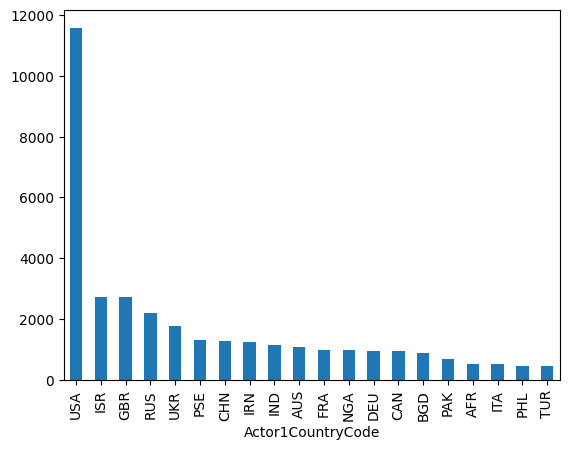

In [28]:
events_2["Actor1CountryCode"].value_counts().head(20).plot(kind='bar')

In [29]:
events_2.query("Actor1CountryCode == 'UNK'")

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear


In [30]:
#grouped = events_2.groupby(['Actor1CountryCode', 'SQLDATE'])

#Paso 2: Calcular el promedio ponderado de GoldsteinScale
#Usamos NumArticles como el peso para el cálculo del promedio ponderado
#def weighted_average(df, value_column, weight_column):
#    return (df[value_column] * df[weight_column]).sum() / df[weight_column].sum()

#events_2['WeightedGoldstein'] = grouped.apply(lambda x: weighted_average(x, 'GoldsteinScale', 'NumArticles')).reset_index(level=[0,1], drop=True)

#Paso 3: Crear el "Inestability Index" como el promedio ponderado
#inestability_index = grouped['WeightedGoldstein'].mean().reset_index()

#Renombrar la columna para el índice final
#inestability_index.columns = ['Country', 'Date', 'InestabilityIndex']

#print(inestability_index)


In [31]:
#inestability_index.orderby("Country")
filtered_df = events_2.query("Actor1CountryCode == 'AFG' & SQLDATE == '2024-08-05'")

filtered_df

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear
22669,1192232082,TALIBAN,AFG,40,40,4,1,1.0,2,1,2,-3.924222,0,38.8951,-77.0364,38.8951,-77.0364,38.8951,-77.0364,2024-08-05,2024-08-01


In [32]:
events_2.head()

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear
0,1192141741,SCOTLAND,GBR,51,51,5,1,3.4,12,2,12,-0.600302,0,54.5000,-6.5000,54.5000,-6.5000,54.5000,-6.5000,2023-08-13,2023-08-01
1,1192141745,ISRAEL,ISR,138,138,13,3,-7.0,20,2,20,-4.795873,0,31.4167,34.3333,31.4167,34.3333,31.4167,34.3333,2024-07-13,2024-07-01
2,1192141746,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,15.3500,75.1667,17.0000,-4.0000,15.3500,75.1667,2024-07-13,2024-07-01
3,1192141747,MALI,MLI,60,60,6,2,6.0,6,1,6,-7.187500,0,17.0000,-4.0000,50.4333,30.5167,50.4333,30.5167,2024-07-13,2024-07-01
4,1192141748,MALI,MLI,60,60,6,2,6.0,1,1,1,-7.187500,0,17.0000,-4.0000,17.0000,-4.0000,50.4333,30.5167,2024-07-13,2024-07-01


# EDA

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

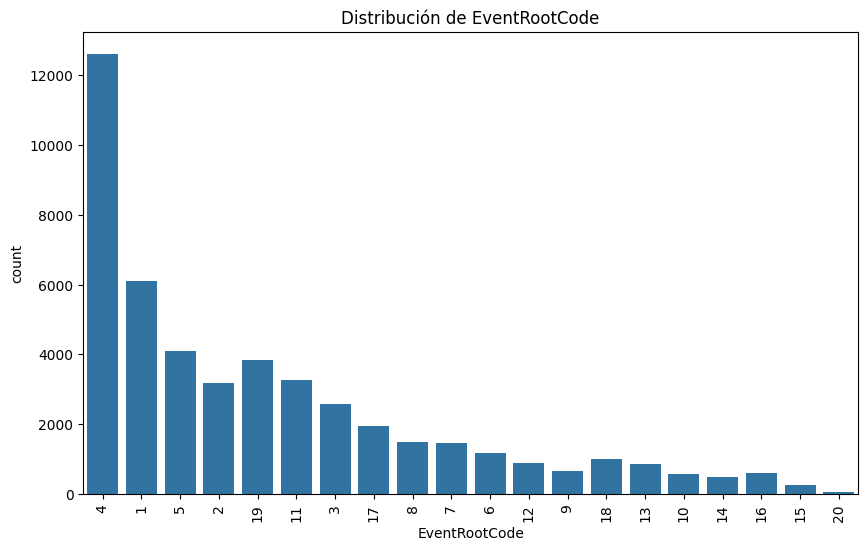

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EventRootCode', data=events_2, order=events['EventRootCode'].value_counts().index)
plt.title('Distribución de EventRootCode')
plt.xticks(rotation=90)
plt.show()

<Axes: >

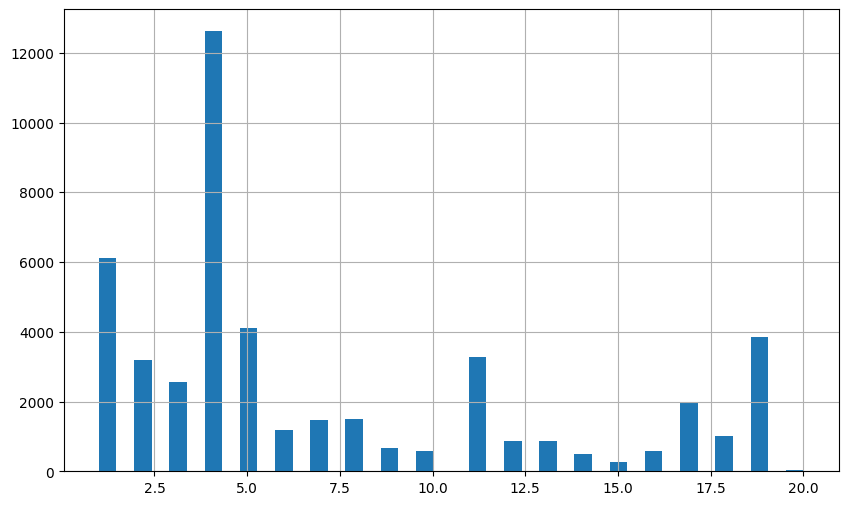

In [35]:
events_2['EventRootCode'].hist(grid=True, bins=40, figsize=(10, 6))

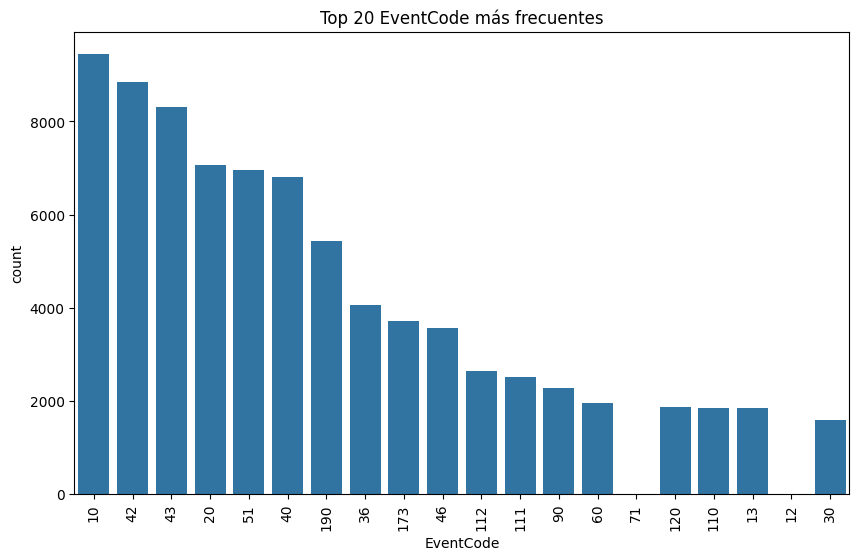

In [36]:
top_event_codes = events_2['EventCode'].value_counts().nlargest(20).index

plt.figure(figsize=(10, 6))
sns.countplot(x='EventCode', data=events[events['EventCode'].isin(top_event_codes)],
              order=events['EventCode'].value_counts().nlargest(20).index)
plt.title('Top 20 EventCode más frecuentes')
plt.xticks(rotation=90)
plt.show()

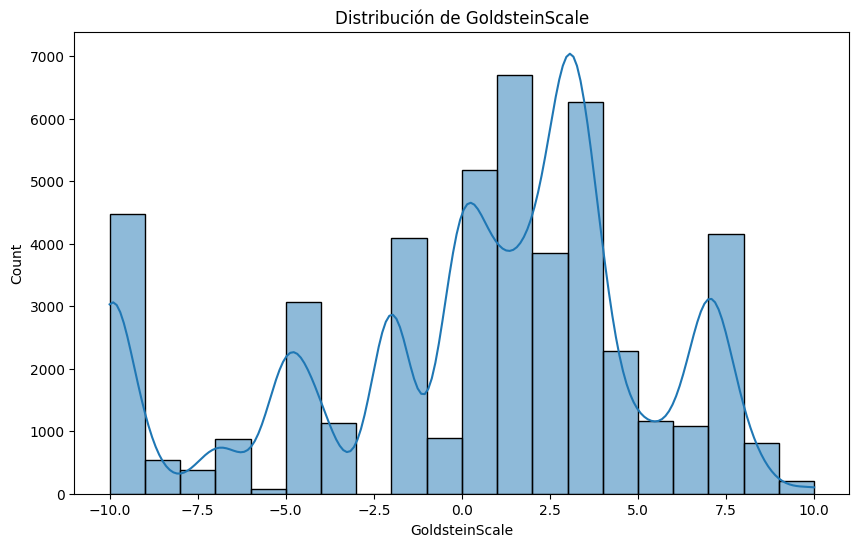

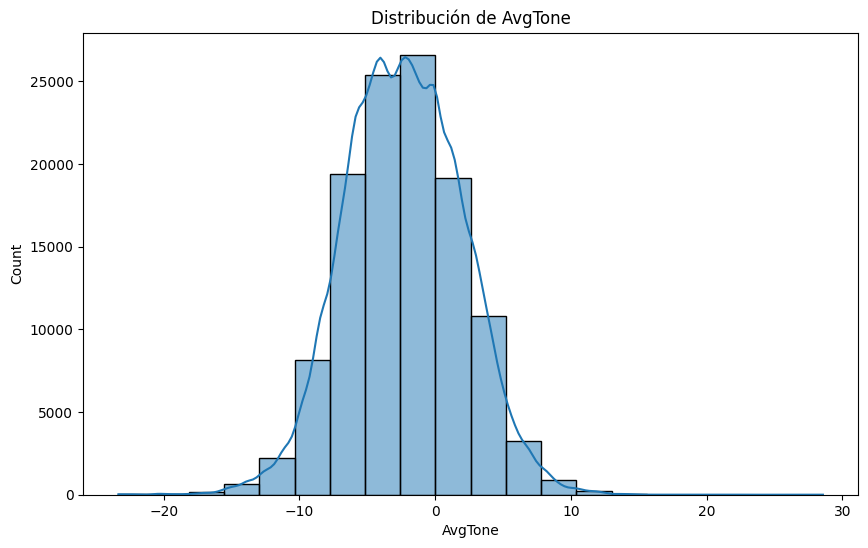

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(events_2['GoldsteinScale'], bins=20, kde=True)
plt.title('Distribución de GoldsteinScale')
plt.show()

# Distribución de AvgTone
plt.figure(figsize=(10, 6))
sns.histplot(events['AvgTone'], bins=20, kde=True)
plt.title('Distribución de AvgTone')
plt.show()


In [38]:
events_2.pivot_table(index="Actor1CountryCode", values="GoldsteinScale", aggfunc="mean").sort_values(by="GoldsteinScale", ascending=False).head(20)

,GoldsteinScale
Actor1CountryCode,
ERI,10.000000
AND,7.000000
BWA,5.266667
MAC,4.600000
BMU,4.551852
PLW,4.529412
SLB,4.421739
GTM,4.300000
FSM,4.222222


In [39]:
events_2.query("Actor1CountryCode == 'ERI'")

,GLOBALEVENTID,Actor1Name,Actor1CountryCode,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,IsRootEvent,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Lat,ActionGeo_Long,SQLDATE,MonthYear
3193,1192153606,ERITREAN,ERI,874,87,8,2,10.0,14,14,14,-5.288313,0,15.0,39.0,13.5,39.5,11.1667,39.1667,2024-08-12,2024-08-01
3194,1192153607,ERITREAN,ERI,874,87,8,2,10.0,14,14,14,-5.288313,0,15.0,39.0,13.5,39.5,13.5000,39.5000,2024-08-12,2024-08-01


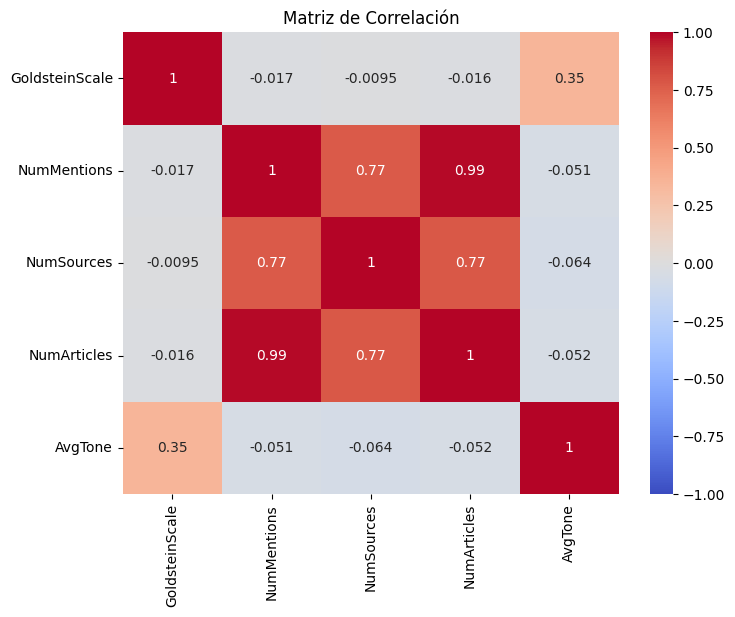

In [40]:
# correlaciones
subset_events = events_2[['GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone']]

corr_matrix = subset_events.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

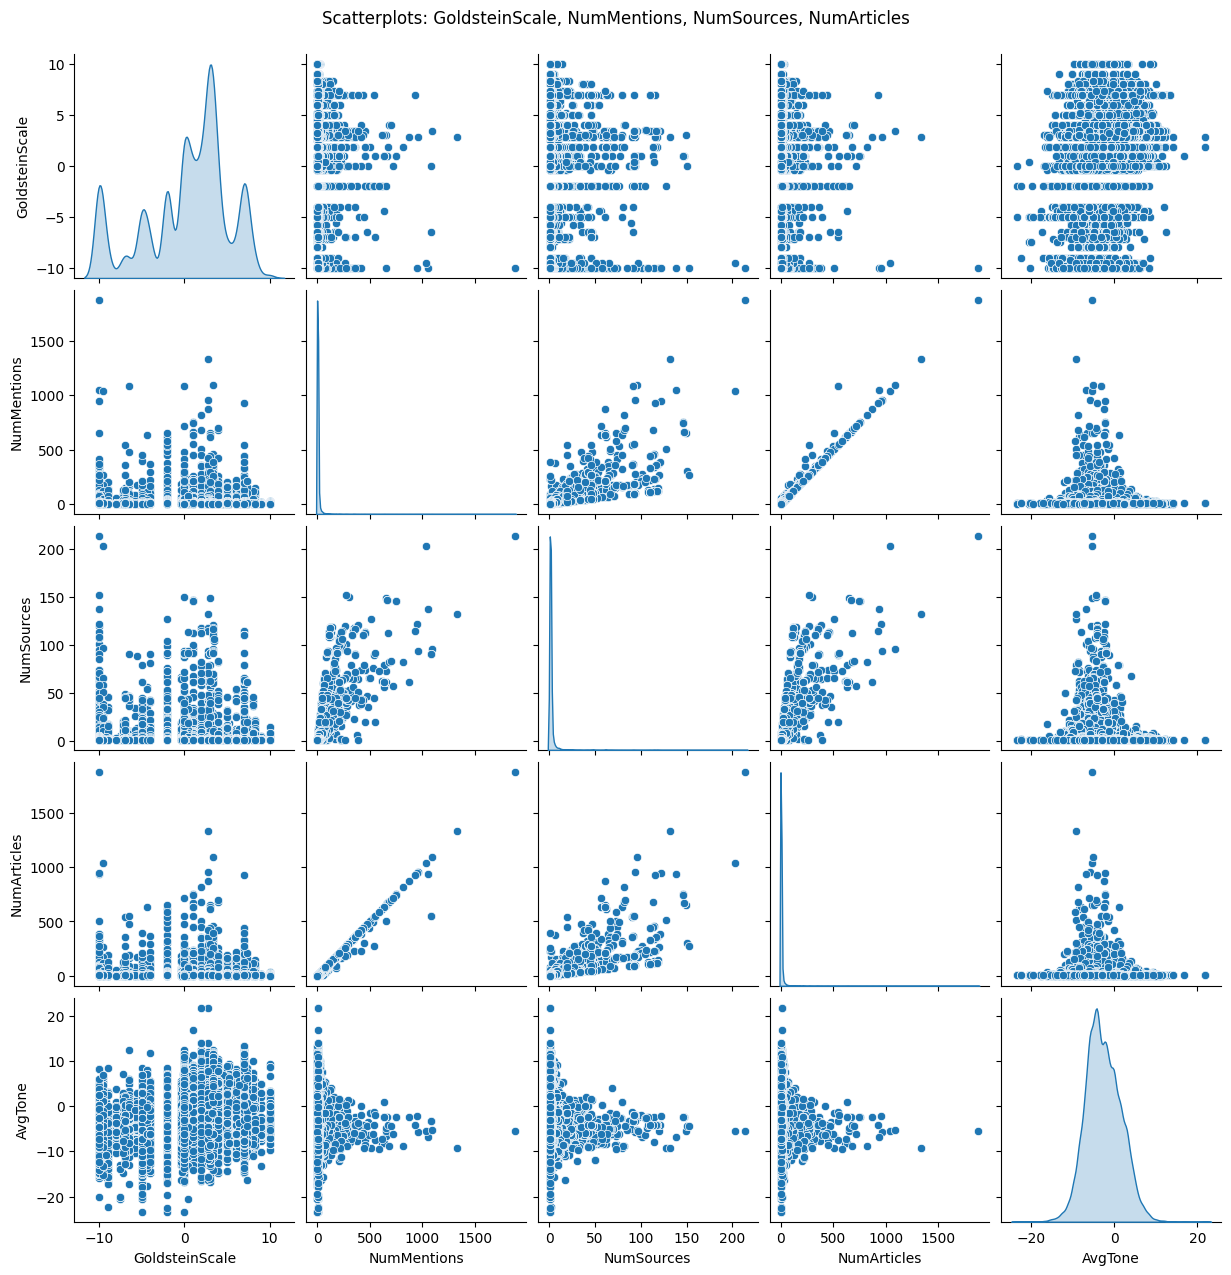

In [41]:
sns.pairplot(subset_events, kind='scatter', diag_kind='kde')
plt.suptitle('Scatterplots: GoldsteinScale, NumMentions, NumSources, NumArticles', y=1.02)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [43]:
# crear variables temporales
events_2['SQLDATE'] = pd.to_datetime(events_2['SQLDATE'])
events_2['day'] = events_2['SQLDATE'].dt.day
events_2['week'] = events_2['SQLDATE'].dt.isocalendar().week
events_2['month'] = events_2['SQLDATE'].dt.month
events_2['year'] = events_2['SQLDATE'].dt.year
events_2['day_of_week'] = events_2['SQLDATE'].dt.dayofweek

In [44]:
# features lag
events_2['GoldsteinScale_lag1'] = events_2['GoldsteinScale'].shift(1)
events_2['GoldsteinScale_lag7'] = events_2['GoldsteinScale'].shift(7)
events_2['GoldsteinScale_lag30'] = events_2['GoldsteinScale'].shift(30)
events_2['AvgTone_lag1'] = events_2['AvgTone'].shift(1)
events_2['NumMentions_lag1'] = events_2['NumMentions'].shift(1)

In [45]:
# features ventanas móvil
events_2['GoldsteinScale_roll7'] = events_2['GoldsteinScale'].rolling(window=7).mean()
events_2['AvgTone_roll7'] = events_2['AvgTone'].rolling(window=7).mean()
events_2['NumMentions_roll7'] = events_2['NumMentions'].rolling(window=7).mean()

In [48]:
events_2.dropna(inplace=True)

In [51]:
X = events_2[['day', 'week', 'month', 'year', 'day_of_week', 'GoldsteinScale_lag1',
              'GoldsteinScale_lag7', 'AvgTone_lag1', 'NumMentions_lag1',
              'GoldsteinScale_roll7', 'AvgTone_roll7', 'NumMentions_roll7',
              'QuadClass', 'EventCode']]
y = events_2['GoldsteinScale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

time_model = RandomForestRegressor(n_estimators=100, random_state=42)
time_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred = time_model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.365374019919523e-05


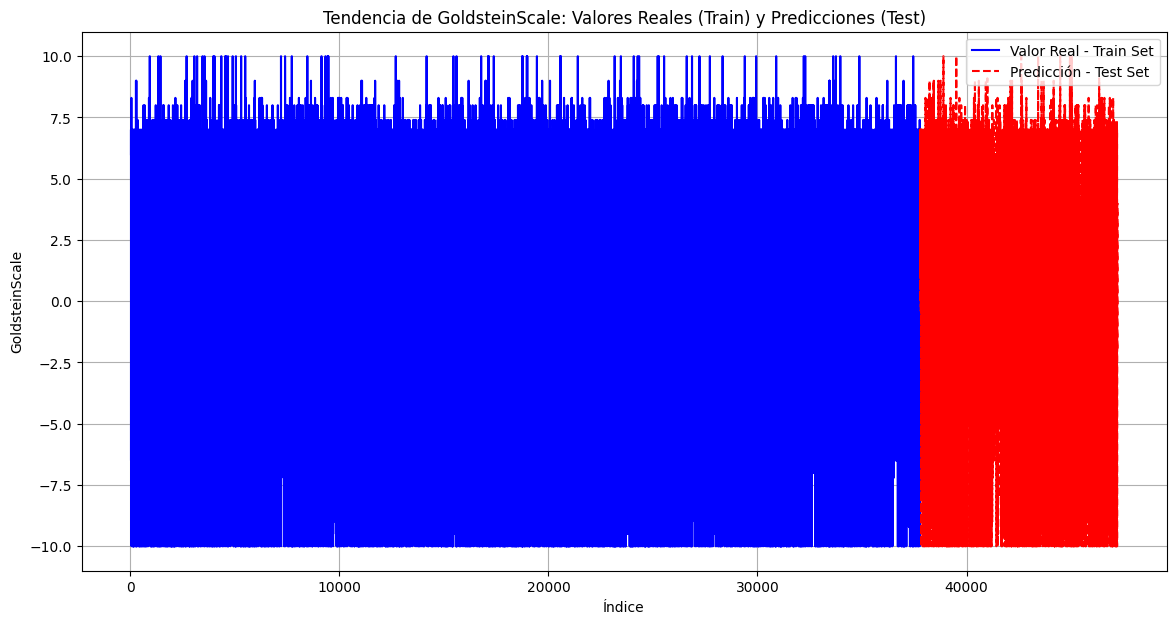

In [57]:
y_test_pred = model.predict(X_test)

# Crear la gráfica combinada
plt.figure(figsize=(14, 7))

# Graficar los valores reales de GoldsteinScale en el conjunto de entrenamiento
plt.plot(y_train.index, y_train, label='Valor Real - Train Set', color='blue')

# Graficar las predicciones de GoldsteinScale en el conjunto de prueba
plt.plot(y_test.index, y_test_pred, label='Predicción - Test Set', color='red', linestyle='--')

# Configuraciones de la gráfica
plt.title('Tendencia de GoldsteinScale: Valores Reales (Train) y Predicciones (Test)')
plt.xlabel('Índice')
plt.ylabel('GoldsteinScale')
plt.legend()
plt.grid(True)
plt.show()

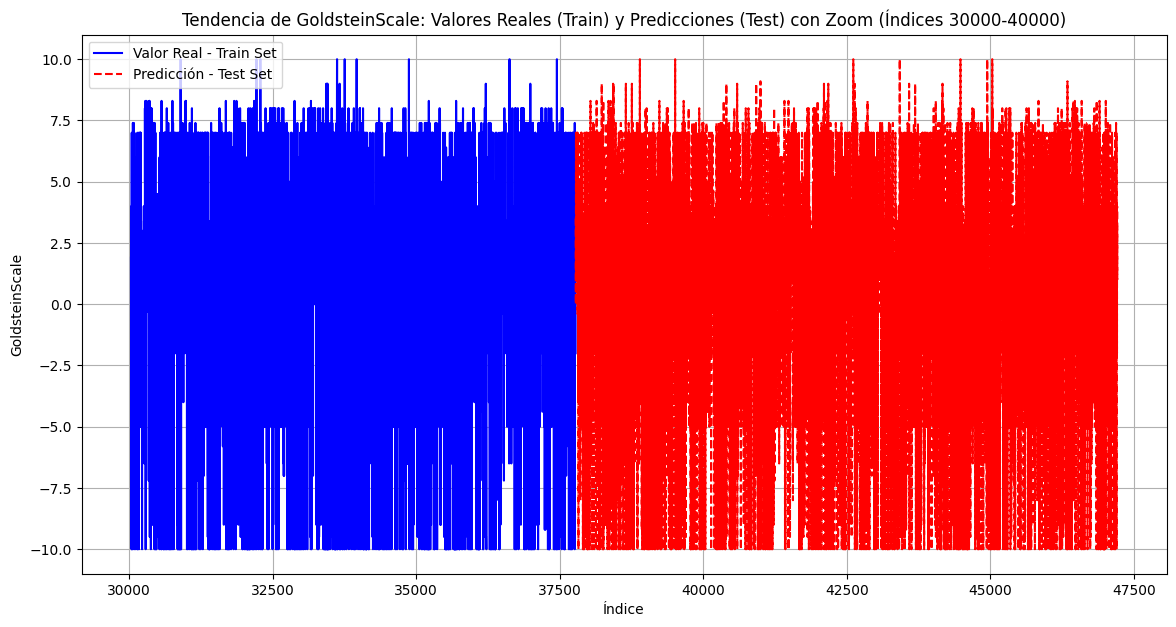

In [60]:
zoom_start_train = 30000
zoom_end_train = 40000

# Asegurarse de que el rango de índices esté dentro de los límites
zoom_start_train = max(zoom_start_train, 0)
zoom_end_train = min(zoom_end_train, len(y_train))

# Crear la gráfica combinada con zoom
plt.figure(figsize=(14, 7))

# Graficar los valores reales de GoldsteinScale en el conjunto de entrenamiento
plt.plot(y_train.index[zoom_start_train:zoom_end_train], y_train.iloc[zoom_start_train:zoom_end_train],
         label='Valor Real - Train Set', color='blue')

# Graficar las predicciones de GoldsteinScale en el conjunto de prueba
plt.plot(y_test.index, y_test_pred,
         label='Predicción - Test Set', color='red', linestyle='--')

# Configuraciones de la gráfica
plt.title('Tendencia de GoldsteinScale: Valores Reales (Train) y Predicciones (Test) con Zoom (Índices 30000-40000)')
plt.xlabel('Índice')
plt.ylabel('GoldsteinScale')
plt.legend()
plt.grid(True)
plt.show()